# Exploring the Analysis of Paintings: Styles, Genres, and Dimensional Ratios

## Description of Dataset 

    The dataset that I have decided to use for my report is a collection of information of 103,000+ paintings, primarily taken off of Wikiart, that lists relevant information such as artist, date created, genre, style, and file dimensions in pixels. I was able to obtain the dataset through Kaggle, which was using it for a competition in which teams would create neural algorithms to 'examine pairs of of paintings and determine if they are by the same artist.' To complete this task, teams would need to take into consideration the varying aspects of a painter that distinguish their style from other painters, such as brushstrokes, how shadows are used, space, texture, etc. 
    
    I find this dataset interesting since its catalogue contains 133 different styles of art from all around the world, while also listing the 43 genres that the individaul paintings may fall into. Due to this and the fact that 74% of all paintings contain their year made, I will be able to use this data as a sample for all paintings in the world such that I may explore the variations in popularity of each style and genre throughout the past nearly 1,000 years. To have a cleaner set of data with all necessary information, the dataset has been gone over to remove all paintings lacking information for year made, style, and genre.
    
    As much as I would love to analyze the data for all of these styles and genres and study each of their facets, doing so would take an unnecessary amount of time, so I will narrow down my prospects into three questions for a small amount of the more popular styles and genres:
    
    1. Of the five most popular styles of painting, what have their trends for paintings made per year been like? Have they been relatively consistent, have they had low periods, or have they been consistently in decline? Are there any correlations between the rise and fall of certain styles?
    
    2. Has preferred ratio for the dimensions of a painting by painters across the globe changed at all in the past 300 years? Is there a certain range of ratio that is desired, and has this range changed?
    
    Additionally, through this invetigation, are there certain styles that prefer certain ratio ranges over ranges?
    
    3. Do certain styles beget certain genres, and vice versa? Can we fairly use analytics to determine that if a painting is of a certain genre, then is there a high chance that it is of a certain style? 

In [2]:
import os

os.chdir('C:\\Users\\Trevor\\Downloads')

In [3]:
import pandas as pd

need = pd.read_csv('artnew.csv')
art = pd.DataFrame(need)
%store art
art

Stored 'art' (DataFrame)


,artist,made,genre,pixelsx,pixelsy,size_bytes,source,type,title,artist_group,in_train,new_filename
0,Gustavo Foppiani,1059,religious painting,345,500,98929,wikiart,Surrealism,Angelo Cattivo Chesuona,train_and_test,True,73492.jpg
1,Guo Xi,1072,shan shui,1280,838,256805,wikipedia,Ink and wash painting,Clearing Autumn Skies over Mountains and Valle...,train_only,True,81172.jpg
2,Guo Xi,1072,shan shui,704,1024,239607,wikipedia,Ink and wash painting,Early Spring,train_only,True,28974.jpg
3,Guo Xi,1072,shan shui,1085,443,186075,wikiart,Ink and wash painting,Clearing Autumn Skies over Mountains and Valle...,train_only,True,42452.jpg
4,Guo Xi,1080,shan shui,1730,600,246506,wikiart,Ink and wash painting,"Old Trees, Level Distance",train_only,True,49434.jpg
5,Emperor Huizong,1100,genre painting,876,1024,195928,wikipedia,Gongbi,Women preparing silk (after Zhang Xuan),train_only,True,71501.jpg
6,Emperor Huizong,1100,genre painting,750,1145,233019,wikiart,Gongbi,An Elegant Party,train_only,True,39301.jpg
7,Emperor Huizong,1100,genre painting,1024,757,365453,wikipedia,Gongbi,An Elegant Party (detail),train_only,True,50152.jpg
8,Emperor Huizong,1108,bird-and-flower painting,753,820,380824,wikiart,Gongbi,Pigeon on a Peach Branch,train_only,True,86629.jpg
9,Emperor Huizong,1112,animal painting,1280,474,157673,wikiart,Gongbi,Auspicious Cranes,train_only,True,98486.jpg


## Question #1

Of the five most popular styles of painting, what have their trends for paintings made per year been like? Have they been relatively consistent, have they had low periods, or have they been consistently in decline? Are there any correlations between the rise and fall of certain styles?

,Style
Impressionism,8275
Realism,8169
Romanticism,6505
Expressionism,5544
Post-Impressionism,4198
Other,43126


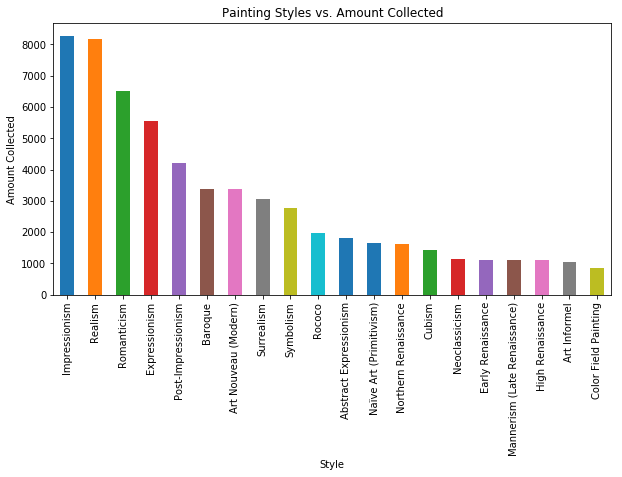

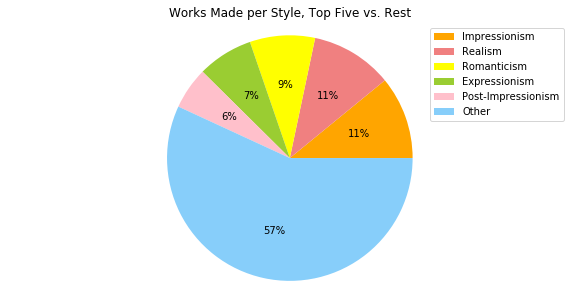

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plt.subplot(1, 2, 1)
art.type.value_counts().head(20).plot(kind='bar', figsize = (10, 5))
plt.title('Painting Styles vs. Amount Collected')
plt.ylabel('Amount Collected')
plt.xlabel('Style')


all = art.type.tolist()
styles = pd.DataFrame(all, columns = ['Style'])

amount = pd.DataFrame(styles.Style.value_counts())
other = int(amount[5:].sum())
amount = amount[:5]
amount.loc[5] = other
amount = amount.rename(index = {5: 'Other'})

#plt.subplot(1, 2, 2)
plt.figure(figsize = (10, 5))
colors = ['orange', 'lightcoral', 'yellow', 'yellowgreen', 'pink', 'lightskyblue']
plt.pie(amount.Style, autopct = '%1.0f%%', colors = colors)
plt.axis('equal')
plt.title('Works Made per Style, Top Five vs. Rest')
plt.legend(amount.index)

amount

As we can see in the bar chart above, the five most popular styles of painting are vastly more popular, or perhaps more well-documented and collected, than most other styles in terms of amount of works created, with the majority being less than an eigth the size of the two most popular.

On the pie chart, we can see that the top five most popular styles make up a massive 43% of all works made in our dataset. While this may not seem that impressive, we must consider that the other 57% of our dataset is comprised of 128 styles, meaning that these top five styles having such large percentages is pretty significant.

In [5]:
impressionism = pd.DataFrame(art[art.type == 'Impressionism'])
realism = pd.DataFrame(art[art.type == 'Realism'])
romanticism = pd.DataFrame(art[art.type == 'Romanticism'])
expressionism = pd.DataFrame(art[art.type == 'Expressionism'])
postimp = pd.DataFrame(art[art.type == 'Post-Impressionism'])

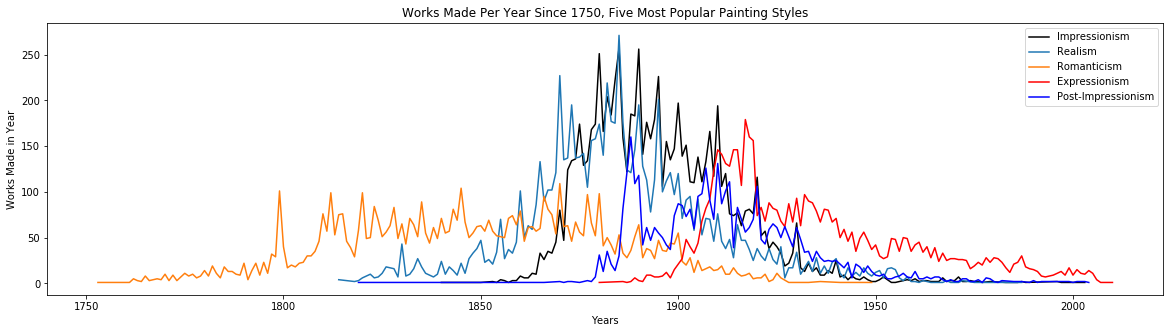

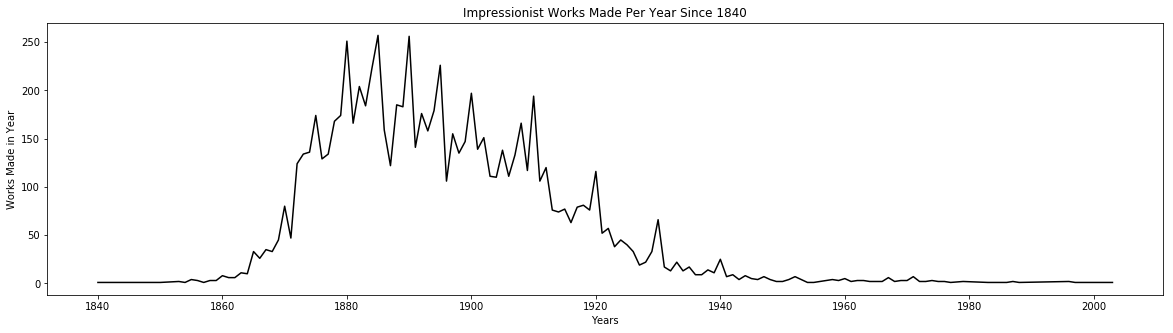

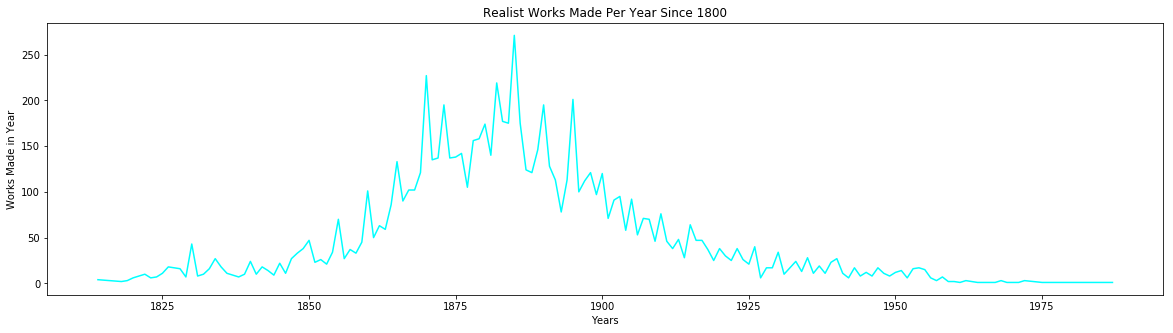

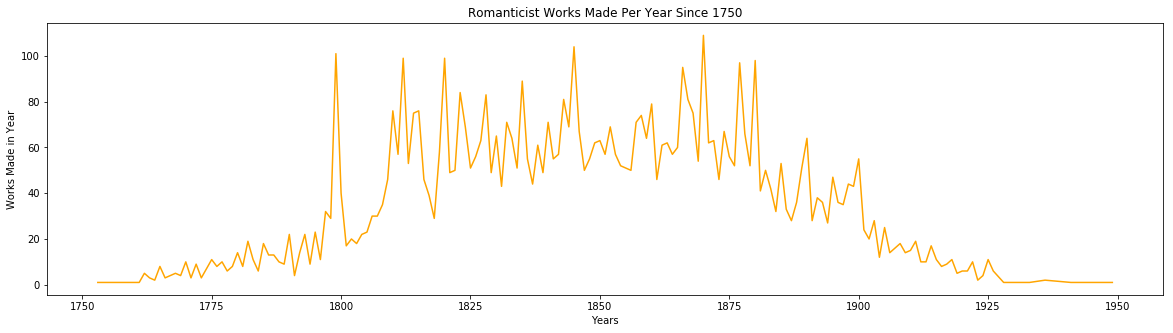

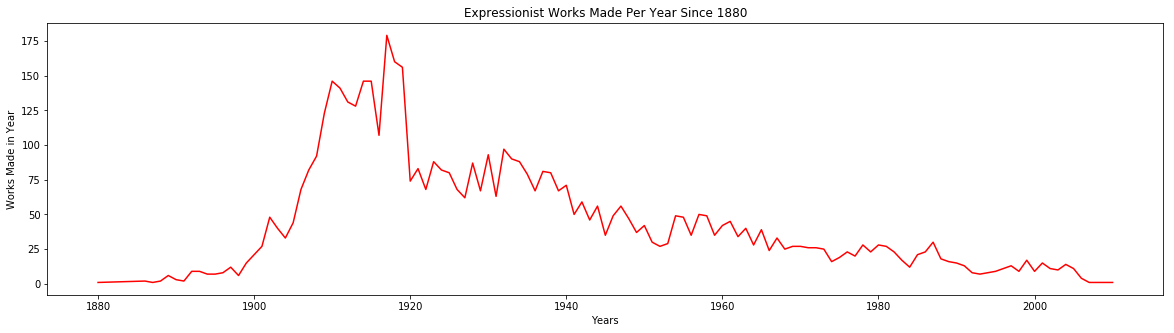

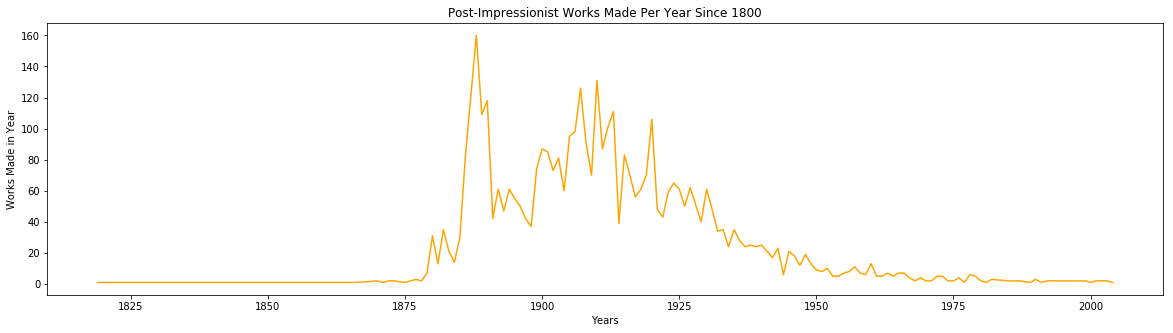

In [6]:
plt.figure(figsize=(20, 5))

plt.plot(impressionism.made.value_counts().sort_index(), color = 'black')
plt.plot(realism.made.value_counts().sort_index())
plt.plot(romanticism.made.value_counts().sort_index())
plt.plot(expressionism.made.value_counts().sort_index(), color = 'red')
plt.plot(postimp.made.value_counts().sort_index(), color = 'blue')

plt.xlabel('Years')
plt.ylabel('Works Made in Year')
plt.title('Works Made Per Year Since 1750, Five Most Popular Painting Styles')
plt.legend(['Impressionism', 'Realism', 'Romanticism', 'Expressionism', 'Post-Impressionism'], loc = 'best')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(impressionism.made.value_counts().sort_index(), color = 'black')
plt.xlabel('Years')
plt.ylabel('Works Made in Year')
plt.title('Impressionist Works Made Per Year Since 1840')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(realism.made.value_counts().sort_index(), color = 'cyan')
plt.xlabel('Years')
plt.ylabel('Works Made in Year')
plt.title('Realist Works Made Per Year Since 1800')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(romanticism.made.value_counts().sort_index(), color = 'orange')
plt.xlabel('Years')
plt.ylabel('Works Made in Year')
plt.title('Romanticist Works Made Per Year Since 1750')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(expressionism.made.value_counts().sort_index(), color = 'red')
plt.xlabel('Years')
plt.ylabel('Works Made in Year')
plt.title('Expressionist Works Made Per Year Since 1880')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(postimp.made.value_counts().sort_index(), color = 'orange')
plt.xlabel('Years')
plt.ylabel('Works Made in Year')
plt.title('Post-Impressionist Works Made Per Year Since 1800')
plt.show()


We can see from the plot above that romanticism certainly started much earlier, about six years so, than any of the other styles. However, while maintaining a relatively consistent amount of works made per year from 1800 to the late 1900s, it never quite peaked in the way that any of the other styles did. For example, impressionism and realism certainly peaked such that they have a distribution from the early 1800s to ~1950 that looks nearly normal. For the last two, expressionism and post-impressionism, we can see that they both have somewhat oddly formed distributions that are surely not normal.

One aspect to point out here is that, while the majority of these styles have very much tapered and gone into slumber since their inception, expressionism is the only style that has perservered and maintained somewhat of a relevant in the modern day.

These were only the top five painting styles we worked with as a basic example, so now let's explore a slightly simpler, slightly more interesting example to work with from a historical perspective: Ukiyo-e and Shin-hanga.

According to Wikipedia, "Ukiyo-e is a genre of Japanese art which flourished from the 17th through 19th centuries. Its artists produced woodblock prints and paintings of such subjects as female beauties; kabuki actors and sumo wrestlers; scenes from history and folk tales; travel scenes and landscapes; flora and fauna; and erotica. The term ukiyo-e (浮世絵) translates as "picture[s] of the floating world"."

"Shin-hanga (新版画, lit. "new prints", "new woodcut (block) prints") was an art movement in early 20th-century Japan, during the Taishō and Shōwa periods, that revitalized traditional ukiyo-e art rooted in the Edo and Meiji periods (17th–19th century). It maintained the traditional ukiyo-e collaborative system (hanmoto system) where the artist, carver, printer, and publisher engaged in division of labor, as opposed to the sōsaku-hanga (creative prints) movement which advocated the principles of "self-drawn" (jiga), "self-carved" (jikoku) and "self-printed" (jizuri), according to which the artist, with the desire of expressing the self, is the sole creator of art."

I've decided to choose these two styles to work with as Shin-hanga took inspiration from European Impressionism, influencing how light and mood expression was expressed while still retaining traditional themes and focuses. As such, I would like to explore if there is a correlation between trends in ukiyo-e around the rise of shin-hanga to determine if shin-hanga may have lead to a decrease in the amount of ukiyo-e works created.

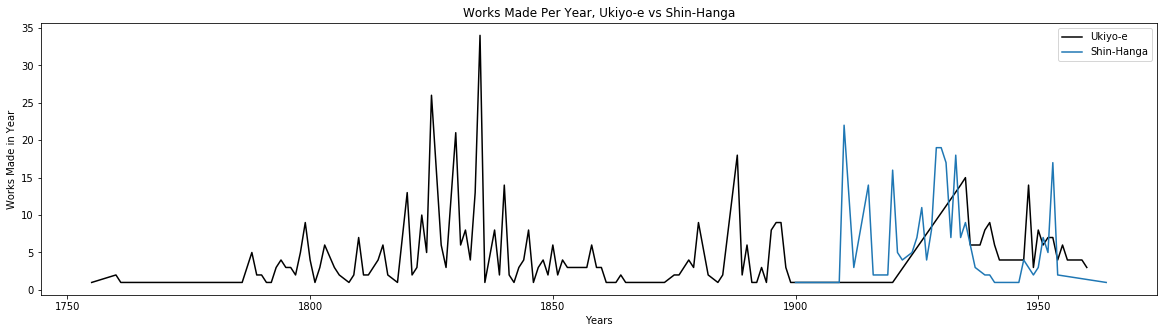

In [7]:
ukiyo = pd.DataFrame(art[art.type == 'Ukiyo-e'])
shin = pd.DataFrame(art[art.type == 'Shin-hanga'])

plt.figure(figsize=(20, 5))

plt.plot(ukiyo.made.value_counts().sort_index(), color = 'black')
plt.plot(shin.made.value_counts().sort_index())

plt.xlabel('Years')
plt.ylabel('Works Made in Year')
plt.title('Works Made Per Year, Ukiyo-e vs Shin-Hanga')

plt.legend(['Ukiyo-e', 'Shin-Hanga'], loc = 'best')
plt.show()

Well, it seems as if our hypothesis may be correct, in that there is somewhat of a correlation between the rise of shin-hanga and the downfall of ukiyo-e. However, ukiyo-e seems to have already been in a downfall for a few years here, and thus the truthfulness of this result may not be the most realiable. Additionally, interestingly enough, it does seem like ukiyo-e had a bit of a revival after the birth of shin-hanga, which may have been do to this. However, this could only be fully proven through historical research. Another issue here is that it seems that the sample of both styles in our dataset was rather small, further reducing the reliability of our results.

## Question #2

Has preferred ratio for the dimensions of a painting by painters across the globe changed at all in the past 300 years? Is there a certain range of size that is desired, and has this range changed?
    
Additionally, through this invetigation, are there certain styles that prefer certain ratio ranges over other ranges?

To be able to properly answer this question, we'll need to start dealing with actual quantitative data rather than simply counting qualitative data. Thus, we will need to try using some different charts that'll give us more meaningful results.

To get to those results, we divide all our pixelx (width) by pixely (height) to get our rations. If the ratio is > 1, then width is greater than our height. If the ratio is < 1, then our height is greater than our width. If the ratio is 1, then the painting is square.

To better organize our data, I will break up centuries into quarters and observe each 25 years as their own chunk of data rather than trying to investigate each individual year, which would be unnecessarily specifc and tedious. However, trying to do this for 300+ years is also rather tedious and may make it hard to investigate the trends we want, so we're going to start at 1700.

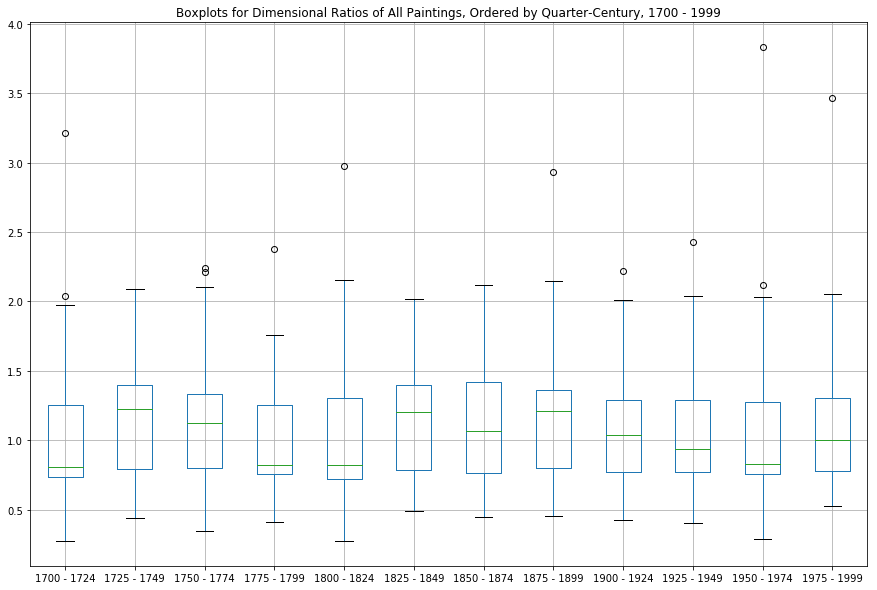

In [8]:
start1700 = pd.DataFrame(art[(art.made.astype('int32') >= 1700) & (art.made.astype('int32') <= 1724)]).reset_index()
start1725 = pd.DataFrame(art[(art.made.astype('int32') >= 1725) & (art.made.astype('int32') <= 1749)]).reset_index()
start1750 = pd.DataFrame(art[(art.made.astype('int32') >= 1750) & (art.made.astype('int32') <= 1774)]).reset_index()
start1775 = pd.DataFrame(art[(art.made.astype('int32') >= 1775) & (art.made.astype('int32') <= 1799)]).reset_index()
start1800 = pd.DataFrame(art[(art.made.astype('int32') >= 1800) & (art.made.astype('int32') <= 1824)]).reset_index()
start1825 = pd.DataFrame(art[(art.made.astype('int32') >= 1825) & (art.made.astype('int32') <= 1849)]).reset_index()
start1850 = pd.DataFrame(art[(art.made.astype('int32') >= 1850) & (art.made.astype('int32') <= 1874)]).reset_index()
start1875 = pd.DataFrame(art[(art.made.astype('int32') >= 1875) & (art.made.astype('int32') <= 1899)]).reset_index()
start1900 = pd.DataFrame(art[(art.made.astype('int32') >= 1900) & (art.made.astype('int32') <= 1924)]).reset_index()
start1925 = pd.DataFrame(art[(art.made.astype('int32') >= 1925) & (art.made.astype('int32') <= 1949)]).reset_index()
start1950 = pd.DataFrame(art[(art.made.astype('int32') >= 1950) & (art.made.astype('int32') <= 1974)]).reset_index()
start1975 = pd.DataFrame(art[(art.made.astype('int32') >= 1975) & (art.made.astype('int32') <= 1999)]).reset_index()

test = pd.DataFrame()
test['1700 - 1724'] = start1700['pixelsx']/start1700['pixelsy']
test['1725 - 1749'] = start1725['pixelsx']/start1725['pixelsy']
test['1750 - 1774'] = start1750['pixelsx']/start1750['pixelsy']
test['1775 - 1799'] = start1775['pixelsx']/start1775['pixelsy']
test['1800 - 1824'] = start1800['pixelsx']/start1800['pixelsy']
test['1825 - 1849'] = start1825['pixelsx']/start1825['pixelsy']
test['1850 - 1874'] = start1850['pixelsx']/start1850['pixelsy']
test['1875 - 1899'] = start1875['pixelsx']/start1875['pixelsy']
test['1900 - 1924'] = start1900['pixelsx']/start1900['pixelsy']
test['1925 - 1949'] = start1925['pixelsx']/start1925['pixelsy']
test['1950 - 1974'] = start1950['pixelsx']/start1950['pixelsy']
test['1975 - 1999'] = start1975['pixelsx']/start1975['pixelsy']

test.boxplot(figsize = [15, 10])
plt.title('Boxplots for Dimensional Ratios of All Paintings, Ordered by Quarter-Century, 1700 - 1999')
plt.show()

We can certainly see that there isn't much of a trend for any quartiles of these boxplots. Yet, knowing that we have so many different styles, which all may have their own unique variations in their own dimensions and proportions, let's break this down to the thirty most popular styles and investigate some statistics since viewing all art as one big blob isn't the most effective method to work with.

The best place to start here would be to investigate the median, mean, and standard deviation of all these dimensional ratios.

In [9]:
top30 = set(pd.DataFrame(art.type.value_counts().head(30)).index)
pixwid = []

art['ratio'] = art['pixelsx']/art['pixelsy']

for i in top30:
    #w = art.pixelsx[art.type == i].tolist()
    #h = art.pixelsy[art.type == i].tolist()
    r = art.ratio[art.type == i].tolist()
    pixwid.append([np.percentile(r, 25), round(np.median(r), 2), np.percentile(r, 75), round(np.mean(r), 2), round(np.std(r), 2)])
    
dim = pd.DataFrame(np.array(pixwid))
dim.columns = ['Q1', 'Median', 'Q3', 'Mean', 'St. Dev.']
dim.index = top30
dim

,Q1,Median,Q3,Mean,St. Dev.
Magic Realism,0.748685,1.00,1.329180,1.09,0.47
Neoclassicism,0.715172,0.80,1.234568,0.93,0.35
Impressionism,0.802476,1.21,1.354926,1.13,0.35
Baroque,0.757602,0.84,1.299109,1.01,0.35
Post-Impressionism,0.791447,1.17,1.296179,1.08,0.32
Cubism,0.739657,0.82,1.244460,0.97,0.32
High Renaissance,0.730250,0.82,1.158374,0.99,0.44
Mannerism (Late Renaissance),0.721073,0.80,1.151009,0.96,0.44
Abstract Expressionism,0.776429,1.01,1.325581,1.09,0.40
Lyrical Abstraction,0.780674,1.01,1.345129,1.10,0.39


Looking at our table above, we can see quickly that among all of the thirty most popular styles of painting, most have SDs in the range of 0.3 - 0.4. Additionally, it's also siginificant to note that almost all of the means are very close to 1.0. 

The medians and quartiles have much more obvious variation, and now there are multiple styles with values of 1.0 exactly. Observing these will give us some more meaningful information as to if certain styles prefer certain ranges of ratios or not.

In [10]:
minr = min(dim['Q3'] - dim['Q1'])
maxr = max(dim['Q3'] - dim['Q1'])

print('The smallest quartile difference is: ' + str(round(minr, 2)) + '.')
print('The largest quartile difference is: ' + str(round(maxr, 2)) + '.')

The smallest quartile difference is: 0.18.
The largest quartile difference is: 0.68.


As we can see, the smallest quartile difference for all of the top thirty styles was 0.18, while the largest was 0.68. As such, if these are the smallest values we get, then we can certainly say that some styles do prefer a rather particular ratio for the dimensions of their paintings to be, while others are much more willing to work with different shapes and variations of canvases.

However, we do still want to investigate if some styles fluctuate over time, so let's investigate Romanticism. Since it was only prominent from 1750 to 1950, we will be working with that range rather than a full 300 years.

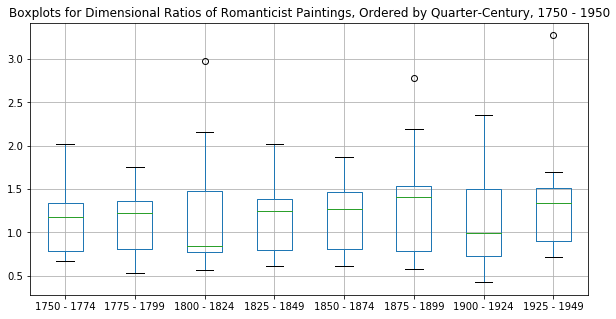

,Q1,Median,Q3,Mean,St. Dev.,Count
1750 - 1774,0.790333,1.18,1.339198,1.13,0.37,64.0
1775 - 1799,0.679878,0.80,1.264259,0.96,0.38,431.0
1800 - 1824,0.740171,0.82,1.355086,1.02,0.37,1240.0
1825 - 1849,0.798438,1.26,1.421703,1.16,0.38,1565.0
1850 - 1874,0.789112,1.26,1.493750,1.18,0.40,1625.0
1875 - 1899,0.740000,1.23,1.503185,1.15,0.46,1185.0
1900 - 1924,0.736466,1.28,1.508357,1.17,0.45,369.0
1925 - 1949,0.901164,1.34,1.515531,1.31,0.50,26.0


In [11]:
start1750 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1750) & (romanticism.made.astype('int32') <= 1774)]).reset_index()
start1775 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1775) & (romanticism.made.astype('int32') <= 1799)]).reset_index()
start1800 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1800) & (romanticism.made.astype('int32') <= 1824)]).reset_index()
start1825 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1825) & (romanticism.made.astype('int32') <= 1849)]).reset_index()
start1850 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1850) & (romanticism.made.astype('int32') <= 1874)]).reset_index()
start1875 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1875) & (romanticism.made.astype('int32') <= 1899)]).reset_index()
start1900 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1900) & (romanticism.made.astype('int32') <= 1924)]).reset_index()
start1925 = pd.DataFrame(romanticism[(romanticism.made.astype('int32') >= 1925) & (romanticism.made.astype('int32') <= 1949)]).reset_index()

all = [start1750, start1775, start1800, start1825, start1850, start1875, start1900, start1925]
stat = []
for i in all:
    i['ratio'] = i['pixelsx']/i['pixelsy']
    r = i.ratio.tolist()
    stat.append([np.percentile(r, 25), round(np.median(r), 2), np.percentile(r, 75), round(np.mean(r), 2), round(np.std(r), 2), len(r)])
    
new = pd.DataFrame(np.array(stat))
new.columns = ['Q1', 'Median', 'Q3', 'Mean', 'St. Dev.', 'Count']
new.index = ['1750 - 1774', '1775 - 1799', '1800 - 1824', '1825 - 1849', '1850 - 1874', '1875 - 1899', '1900 - 1924', '1925 - 1949']

romw = pd.DataFrame()

romw['1750 - 1774'] = start1750['pixelsx']/start1750['pixelsy']
romw['1775 - 1799'] = start1775['pixelsx']/start1775['pixelsy']
romw['1800 - 1824'] = start1800['pixelsx']/start1800['pixelsy']
romw['1825 - 1849'] = start1825['pixelsx']/start1825['pixelsy']
romw['1850 - 1874'] = start1850['pixelsx']/start1850['pixelsy']
romw['1875 - 1899'] = start1875['pixelsx']/start1875['pixelsy']
romw['1900 - 1924'] = start1900['pixelsx']/start1900['pixelsy']
romw['1925 - 1949'] = start1925['pixelsx']/start1925['pixelsy']

romw.boxplot(figsize = [10, 5])
plt.title('Boxplots for Dimensional Ratios of Romanticist Paintings, Ordered by Quarter-Century, 1750 - 1950')
plt.show()

new

Interestingly enough, we can see that the dimensional ranges of romanticist works do actually vary in quartiles over time, but with no particular trend. The fact that the ranges tend to rise and fall without regard to count also proves this lack of trend. 

Hence, we've shown that the general ratios of romanticist paintings do not follow any particular trend with their ranges as the years have passed, meaning that this is also likely to be the case for other styles. 

# Question #3

Do certain styles beget certain genres, and vice versa? Can we fairly use analytics to determine that if a painting is of a certain genre, then is is a high chance that it is of a certain style? 

First, let's see what some of the most popular genres are just so we have an idea of what we might expect to see.

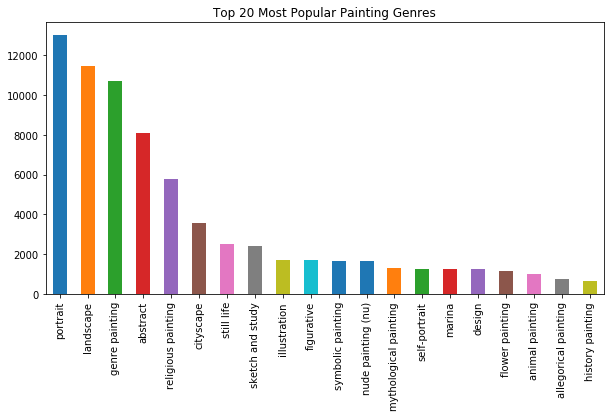

In [12]:
art.genre.value_counts().head(20).plot(kind='bar', figsize = (10, 5))
plt.title('Top 20 Most Popular Painting Genres')
plt.show()

From this, we can see that portraits, landscapes, genre paintings, and abstract paintings are all very popular among the global painting community.

Now, let's take some styles and break them up into genres. However, since we've already used the top five styles, let's use the top five styles right after them for some variation and for something new.

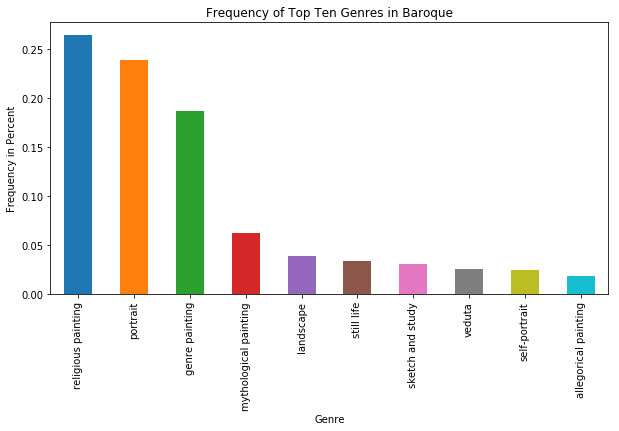

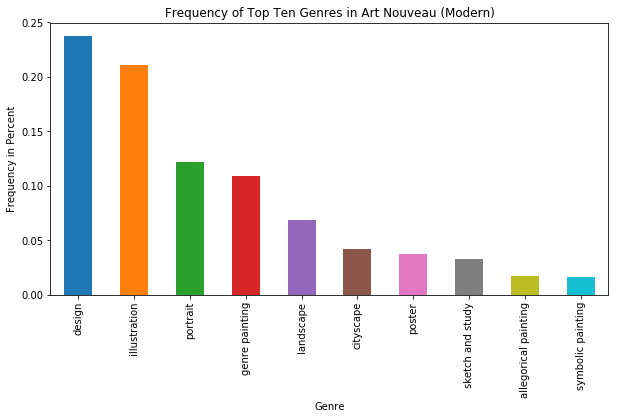

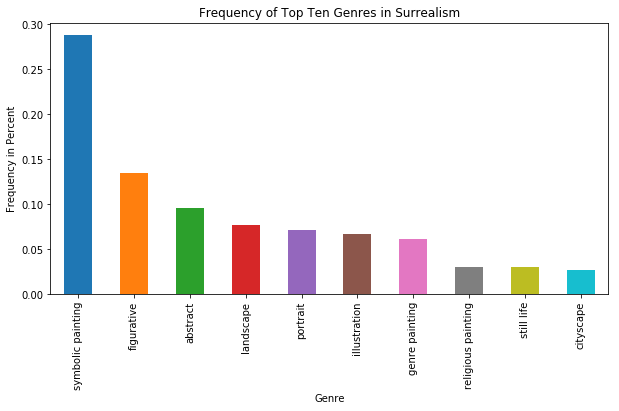

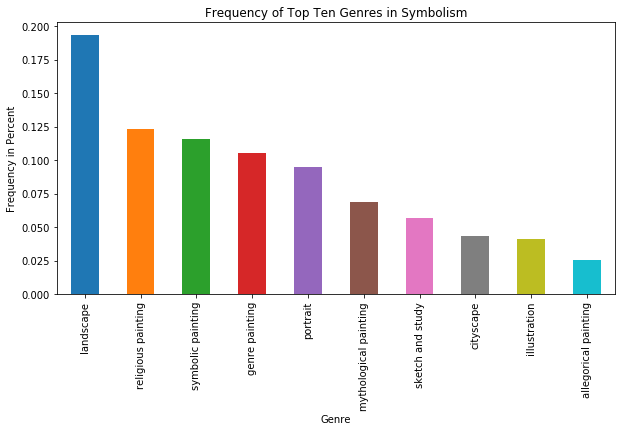

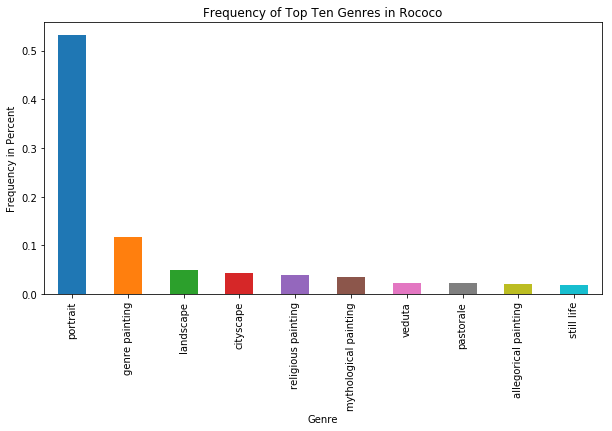

In [13]:
top5 = list(art.type.value_counts().head(10).index)[5:]

style = pd.DataFrame(art.genre[art.type == top5[0]])
style.genre.value_counts(normalize = True).head(10).plot(kind='bar', figsize = (10, 5))
plt.title('Frequency of Top Ten Genres in ' + top5[0])
plt.ylabel('Frequency in Percent')
plt.xlabel('Genre')
plt.show()

style = pd.DataFrame(art.genre[art.type == top5[1]])
style.genre.value_counts(normalize = True).head(10).plot(kind='bar', figsize = (10, 5))
plt.title('Frequency of Top Ten Genres in ' + top5[1])
plt.ylabel('Frequency in Percent')
plt.xlabel('Genre')
plt.show()

style = pd.DataFrame(art.genre[art.type == top5[2]])
style.genre.value_counts(normalize = True).head(10).plot(kind='bar', figsize = (10, 5))
plt.title('Frequency of Top Ten Genres in ' + top5[2])
plt.ylabel('Frequency in Percent')
plt.xlabel('Genre')
plt.show()

style = pd.DataFrame(art.genre[art.type == top5[3]])
style.genre.value_counts(normalize = True).head(10).plot(kind='bar', figsize = (10, 5))
plt.title('Frequency of Top Ten Genres in ' + top5[3])
plt.ylabel('Frequency in Percent')
plt.xlabel('Genre')
plt.show()

style = pd.DataFrame(art.genre[art.type == top5[4]])
style.genre.value_counts(normalize = True).head(10).plot(kind='bar', figsize = (10, 5))
plt.title('Frequency of Top Ten Genres in ' + top5[4])
plt.ylabel('Frequency in Percent')
plt.xlabel('Genre')
plt.show()

For these charts, we got Baroque, Art Nouveau (Modern), Surrealism, Symbolism, and Rococo. 

As we can see, Baroque is very fond of religious paintings(27%), portraits(24%), and genre paintings(19%). 

Art Noueveau (Modern) is fond of design paintings(24%), illustrations(21%), and portraits(12%).

Surrealism is fond of symbolic paintings(29%), figurative paintings(14%), and abstract paintings(9%).

Symbolism is fond of landscape paintings(19%), religious paintings(12%), and symbolic paintings(11%).

Rococo is incredibly fond of portraits(54%), genre paintings(12%), and lanscape paintings(5%).

From these five examples we've used, it's clear that we can very easily see that certain styles do beget certain genres, some much more than others. 

Now, let's see if we can do the same for if certain genres beget certain styles. Let's work with the same idea of not using a popular genre, so we're going to go with flower paintings.

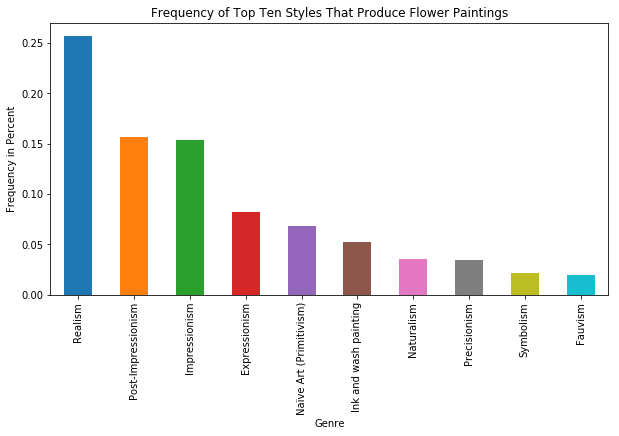

In [14]:
style = pd.DataFrame(art.type[art.genre == 'flower painting'])
style.type.value_counts(normalize = True).head(10).plot(kind='bar', figsize = (10, 5))
plt.title('Frequency of Top Ten Styles That Produce Flower Paintings')
plt.ylabel('Frequency in Percent')
plt.xlabel('Genre')
plt.show()

It's unexpected here to see that the top five styles in general are also the top five styles for this genre considering they make up 43% of our dataset while the other 128 make up 57%, so let's remove them for the moment to see the prominence of those other styles.

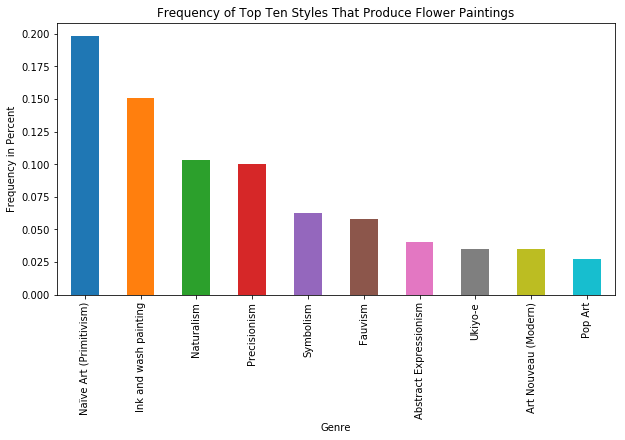

In [15]:
top5 = list(art.type.value_counts().head(5).index)

for i in top5:
    style = style[style.type != i]

style.type.value_counts(normalize = True).head(10).plot(kind='bar', figsize = (10, 5))
plt.title('Frequency of Top Ten Styles That Produce Flower Paintings')
plt.ylabel('Frequency in Percent')
plt.xlabel('Genre')
plt.show()

That's much better! Now we can see that Naive Art, Ink and Wash Paintings, and Naturalism are some of the top styles that produce the most flower paintings compared to others. Thus, we can say that certain genres do beget certain styles as some genres do have a higher chance of being in some styles rather than others.

# Proposed Further Research

I believe that one interesting idea for a research project for this dataset would be determining the top three styles that a painting could be if we are simply given a year in which it was made and a genre through usage of probability considering the prominence of a genre in all given styles in the given time period, which would be proposed as: "How accurately can we determine the possible styles of a painting given a short period it was made in and its genre?" I would go about doing this by making a dataframe, columns being styles, rows being decades, going from 1700 to 2000. Each row would add up to 1, in which each value for each style would be a decimal value between 0 and 1, indicating the probability that a painting from that decade was of that style. I would then make two more dataframes determining similar values between genres and decades, and then genres and styles. I would then use these tables of probabilities to determine which styles have the highest chance of appeasing the two given variables.

Another project I would like to work on through the use of machine learning would to be to include the actual painting files into the dataset. Using machine learning, I would like to analyze a training sample of files and make lists of what general color paleetes are used for each style along with possibly determining certain aspects of brush strokes. I would then use this on a much larger sample to determine if we can accurately determine the style of a painting just through these factors. I would present this as: "How accurately can machine learning be used to determine the style of a painting through consideration of color and brush strokes?" I would do this by giving the machine a training sample of painting files along with their styles, and then determine the common color palettes used along with the common shapes/dimensions of color blots.